In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from math import sqrt
import pickle

data = pd.read_pickle('../data/data.pickle')
len(data)

6618

# Preparación datasets de entrenamiento y test

In [2]:
# separar dataset de entrenamiento de dataset de test
# Output: df_data_test, df_data_train


# Paso 1: Listas que contiene rutas de entrenamiento y test
size_data_test = round(len(data) * 0.2)

data_test = []
for i in range(0, size_data_test):
    data_test.append(data[i])    

    
data_train = []
for i in range(size_data_test, len(data)):
    data_train.append(data[i]) 
    

# Paso 2: Dataframe que contiene las rutas de entrenamiento y test
data_test_routes = []
for route in data_test:
    data_test_routes.append(pd.DataFrame(route))
    
df_data_test = pd.concat(data_test_routes, ignore_index=True)
df_data_test.info()


data_train_routes = []
for route in data_train:
    data_train_routes.append(pd.DataFrame(route))
    
df_data_train = pd.concat(data_train_routes, ignore_index=True)
df_data_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730163 entries, 0 to 730162
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LATITUD        730163 non-null  float64
 1   LONGITUD       730163 non-null  float64
 2   VELOCIDAD      730163 non-null  float64
 3   distance       730163 non-null  float64
 4   Av.Speed       730163 non-null  float64
 5   Time_Av.Speed  730163 non-null  float64
 6   ChangeInSpeed  730163 non-null  float64
 7   length         730163 non-null  int64  
 8   width          730163 non-null  int64  
 9   to_Arrive      730163 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 55.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031831 entries, 0 to 3031830
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   LATITUD        3031831 non-null  float64
 1   LONGITUD       3031831 non-null  float64
 

<ipython-input-2-2cab35440c5c>:32: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_data_train.info(null_counts=True)


In [3]:
df_data_train = df_data_train.rename(columns={'LATITUD': 'Latitude', 'LONGITUD': 'Longitude', 'VELOCIDAD':'Speed', 'distance':'Distance', 'length':'Length', 'width':'Width'})
df_data_test = df_data_test.rename(columns={'LATITUD': 'Latitude', 'LONGITUD': 'Longitude', 'VELOCIDAD':'Speed', 'distance':'Distance', 'length':'Length', 'width':'Width'})

df_data_train.to_Arrive = df_data_train.to_Arrive.round()

# Selección de features
X_test = df_data_test[['Longitude', 'Latitude', 'Speed', 'Distance', 'Av.Speed', 'Time_Av.Speed', 'ChangeInSpeed']] 
y_test = df_data_test["to_Arrive"].values.reshape(-1, 1)

X_train = df_data_train[['Longitude', 'Latitude', 'Speed', 'Distance', 'Av.Speed', 'Time_Av.Speed', 'ChangeInSpeed']]
y_train = df_data_train["to_Arrive"].values.reshape(-1, 1)

# Polynomial regressor

In [4]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# Creando el modelo y entrenando
reg = LinearRegression().fit(X_train_poly,y_train)
# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train_poly)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test_poly)

In [5]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.8491150067563078
Prueba 0.8502671875843766


In [6]:
mae = mean_absolute_error(y_test, y_test_hat)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 15.031414607901517


In [7]:
mse =mean_squared_error(y_test, y_test_hat)
print("Mean Squared Error:",mse)

Mean Squared Error: 682.5731666032614


In [8]:
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 26.126101251492948


In [9]:
error = y_test_hat - y_test

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


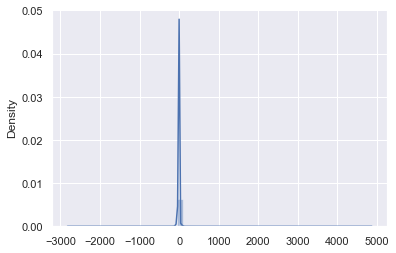

In [10]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(error)